In [1]:
# Question 1
# The standard deviation shows how far away points in the data are from the mean,
# the stanrded deviation captures the spread of the data.
# Howevere the standard error of mean shows the presision of the sample mean compared to the estimate of the true populations mean,
# the standard error of mean captures the accurecy of the sample mean.

In [2]:
# Question 4
import numpy as np

# Sample data (replace this with your actual sample data)
sample = np.array([5, 7, 8, 10, 12, 14, 15, 16, 18, 20])

# Set the number of bootstrap samples
n_bootstrap_samples = 10000

# Set the size of each bootstrap sample (same as original sample size)
n = len(sample)

# Store bootstrapped statistics
bootstrap_means = []

# Generate bootstrap samples and compute the mean for each sample
for _ in range(n_bootstrap_samples):
    # Generate a bootstrap sample by sampling with replacement from the original sample
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    
    # Compute the mean of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    
    # Store the computed mean
    bootstrap_means.append(bootstrap_mean)

# Sort the bootstrap means to find percentiles
bootstrap_means.sort()

# Compute the 95% confidence interval by finding the 2.5th and 97.5th percentiles
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Output the 95% confidence interval for the population mean
print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")

# To produce a 95% bootstrap confidence interval for a different parameter (e.g., median):
# 1. Change np.mean to np.median in the loop where the statistic is computed
# 2. This will store the median of each bootstrap sample in the bootstrap_means list
# 3. The rest of the process remains the same (sorting, finding percentiles)

# Example for median:
bootstrap_medians = []
for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    
    # Compute the median instead of the mean
    bootstrap_median = np.median(bootstrap_sample)
    
    # Store the computed median
    bootstrap_medians.append(bootstrap_median)

# Sort the bootstrap medians and calculate the confidence interval
bootstrap_medians.sort()
lower_bound_median = np.percentile(bootstrap_medians, 2.5)
upper_bound_median = np.percentile(bootstrap_medians, 97.5)

# Output the 95% confidence interval for the population median
print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound_median}, {upper_bound_median}]")


95% Bootstrap Confidence Interval for the Mean: [9.6, 15.4]
95% Bootstrap Confidence Interval for the Median: [8.0, 16.5]


In [3]:
# Question 6
# 1. The process of bootstraping is to take the data of a sample and randomly select a data point the exact number of times as you have data point; next calculate the mean or whatever you want to find. You then repeat this process a bunch of times and plot your means or data points on histogram to find the avrage of all the bootsrapping data sets. 
# 2. The purpose of bootstraping is to get more acurate data from a small sample when you lack resources to increase your sample size. 
# 3. First you would follow the steps from question 1 to find the estmited means put on a histogram; next find the 95% cofindence interval by fiding the 2.5th prencentile and the 97.5th prenctile; if it falls between these numbers you hypothesis may be plausible, if it falls outside these two prencentile your hypothesis may not be plausible. 

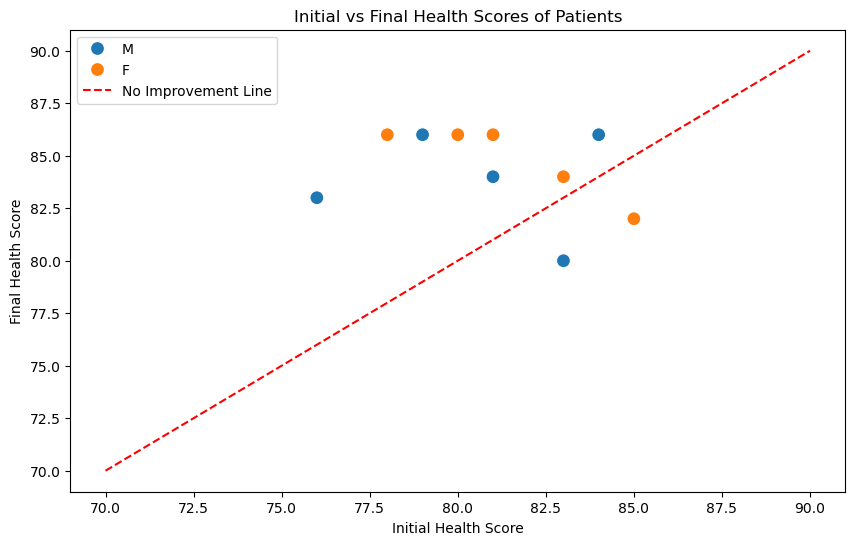

In [4]:
# Question 8 
# Null Hypothesis Explination
    # A null hypothesis is when there is no improvment or in health.
    # An alternative hypothesis is when there is an improvment in health.
# Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Plot initial vs final health scores
plt.figure(figsize=(10,6))
sns.scatterplot(x='InitialHealthScore', y='FinalHealthScore', data=data, hue='Gender', s=100)
plt.plot([70, 90], [70, 90], color='red', linestyle='--', label='No Improvement Line')  # Line representing no improvement
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.title('Initial vs Final Health Scores of Patients')
plt.legend()
plt.show()


In [5]:
# Quantitative Analysis
    # Explination: we repeatedly randomaly sample from the data we already have and then concluded if they are in the 95%.
# Visulization 
import numpy as np

# Calculate the difference in health scores for each patient
data['HealthImprovement'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrap method to calculate the confidence interval of the mean improvement
n_bootstrap_samples = 10000
bootstrap_means = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(data['HealthImprovement'], size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Bootstrap Confidence Interval for Mean Health Improvement: [{lower_bound}, {upper_bound}]")

95% Bootstrap Confidence Interval for Mean Health Improvement: [0.8975000000000023, 5.6]


In [6]:
# Finding and Discussion
    # Conclusion regarding Null Hypothesis: we can can concluded that there is significant evidence that the vaccine improves health since zero is outised the 955 interval.
    # Futher considerations: there is more things to consider gor instace the age, gender or race of the sample. 

In [7]:
# Chatbot Summery
# You asked about the difference between standard error of the mean (SEM) and standard deviation (SD):
    # SD measures variability within the sample data.
    # SEM measures the uncertainty of the sample mean as an estimate of the population mean.
# To create a 95% confidence interval:
    # Using SEM: Add/subtract the SEM times the z-value from the sample mean.
    # Using bootstrapping: Resample data many times, calculate sample means, and find the 2.5th and 97.5th percentiles of the bootstrapped means.
# Importance of distinguishing between the population parameter and sample statistic:
    # Confidence intervals are based on the sample statistic but provide information about the population parameter.
# You asked about bootstrapping:
    # Bootstrapping resamples the data to create a distribution of a statistic (e.g., mean) to assess confidence in the population parameter.
    # It helps evaluate if a hypothesized population mean is plausible by checking if it falls within the bootstrapped confidence interval.
# For evaluating the AliTech vaccine’s effectiveness:
    # We discussed creating visualizations to compare initial and final health scores.
    # Using bootstrapping to calculate a confidence interval for the mean health improvement.
    # Interpretation of the confidence interval to determine whether the vaccine had a statistically significant effect.

In [ ]:
# Chatbot Link
# https://chatgpt.com/share/66ff64ea-51fc-8002-8523-7881e93cb1b1